<a href="https://colab.research.google.com/github/rodsei/data-science-ifes/blob/main/CIDA_Trabalho_1_Problema_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Séries Temporais em Python - Um guia compreensivo com exemplos

---



### Conteúdo

1. [Introdução](https://colab.research.google.com/drive/1er5MkTqMNlkzYUFxI7hWcpJ1Jwl99L1r#scrollTo=vLQXQ8pJ3dAD)
2. []()
3. []()
4. []()

### Referência

Selva Prabhakaran. Time Series Analysis in Python - A Comprehensive Guide with Examples. en- us. Fev. de 2019. url: https://www.machinelearningplus.com/time-series/time-series-analysis-python/ (acesso em 08/08/2021)

# 1. Introdução

Séries temporais são uma sequência de observações registradas em intervalos regulares de tempo, normalmente em horas, dias, semanas, meses e anos. Alguns exemplos de séries temporais podem ser dados como o número de visitas a um site ou os dados coletados de um sensor de temperatura.

A predição de séries temporais representa uma demanda significante para o mercado por lidar com previsão de demanda e vendas, assim como padrões de acesso aos sites de comércios eletrônicos. Para alcançar uma predição assertiva e relevante, é preciso compreender as características naturais da série.

A seguir serão apresentados como lidar com séries temporais, suas características e propriedades.

## 1.1. Importando séries temporais com o Python

Assim como qualquer outra base de dados, estão disponíveis em formato CSV ou XLS e normalmente possuem duas colunas, uma com a data e outra com os dados coletados. Para ler os dados da base, podemos utilizar o Pandas com alguns parâmetros específicos para séries temporais, como o `parse_dates` que irá converter o campo de data para o formato adequado.

A série utilizada para construir os exemplos será referente às vendas de Drogarias na Austrália. A leitura pode ser em um arquivo local ou diretamente de uma URL remota.

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', 
                 parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


Para tornar a série uma série temporal real dentro do Pandas, pode-se utilizar o parâmetro `index_col` ao se ler os dados. Dessa forma, teremos o resultado abaixo:

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', 
                 parse_dates=['date'],
                 index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


## 1.2. Painel de Dados

Assim como a série temporal, o painel de dados também é indexado pelas datas de observação, porém possuem outras variáveis registradas durante os mesmos intervalos. Normalmente apresentam dados exploratórios que auxiliam na predição da variável alvo e que também estarão disponíveis nos intervalos preditos. A seguir um exemplo com uma base de dados com várias variáveis.

In [3]:
# example dataset source: https://github.com/rouseguy
data_panel = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
data_panel = data_panel.loc[data_panel.market=='MUMBAI', :]
data_panel.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


## 1.3. Visualizando uma série temporal

Uma das ferramentas utilizadas em outras análises gráficas, como o `matplotlib` pode ser utilizada também para séries temporais, como pode ser conferido a seguir.

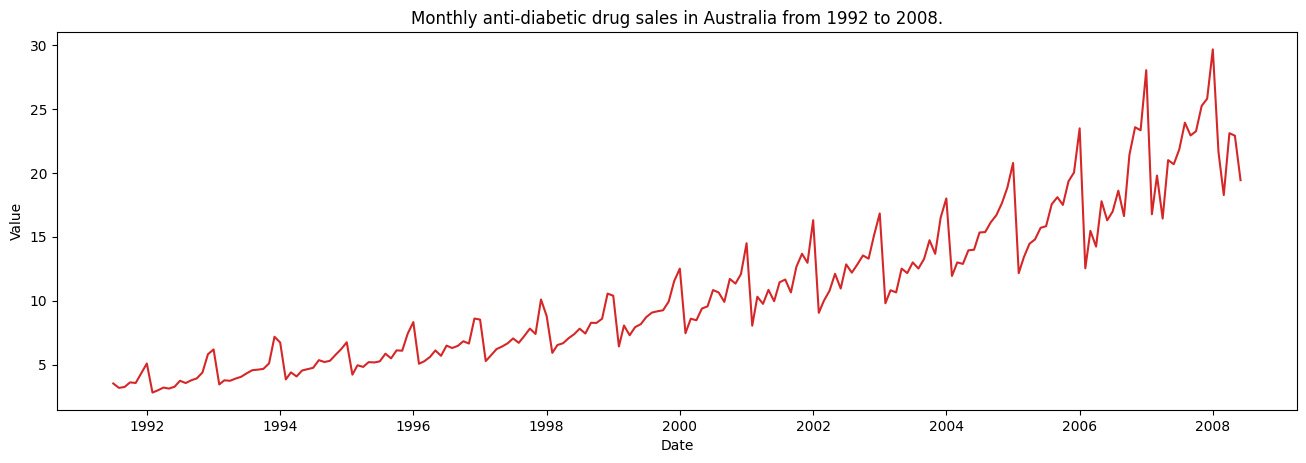

In [4]:
import matplotlib.pyplot as plt
# Configurando o tamanho das imagens geradas nos gráficos
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

Para melhorar a percepção de algumas características, é possível utilizar técnicas de visualização de dados sem modificar o conteúdo original. No caso dessa série, que possui apenas valores positivos, podemos refletir os dados do eixo Y e preencher a área entre os dois intervalos.

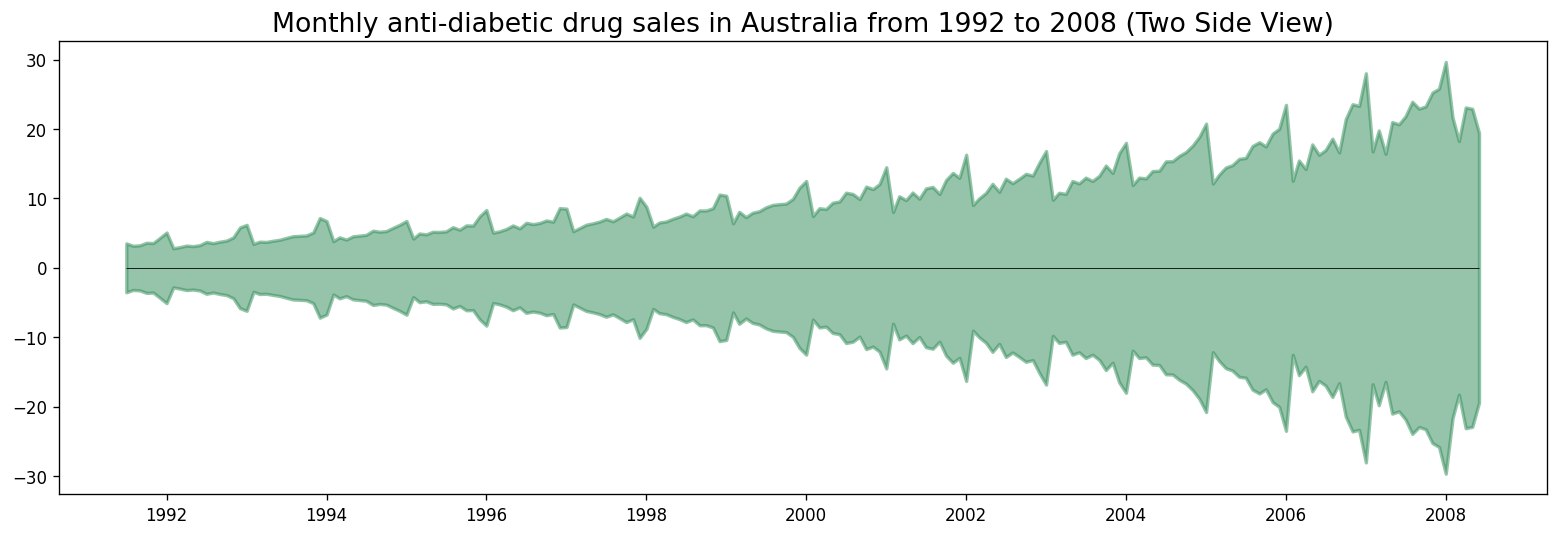

In [5]:
import numpy as np 
x = df.index.values
y1 = df.value

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.title('Monthly anti-diabetic drug sales in Australia from 1992 to 2008 (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5)
plt.show()

Para uma maior clareza sobre o comportamento sazonal da série, é possível observar como os dados se comportam ao longo dos anos, visualizando a evolução mensal de cada ano separadamente.

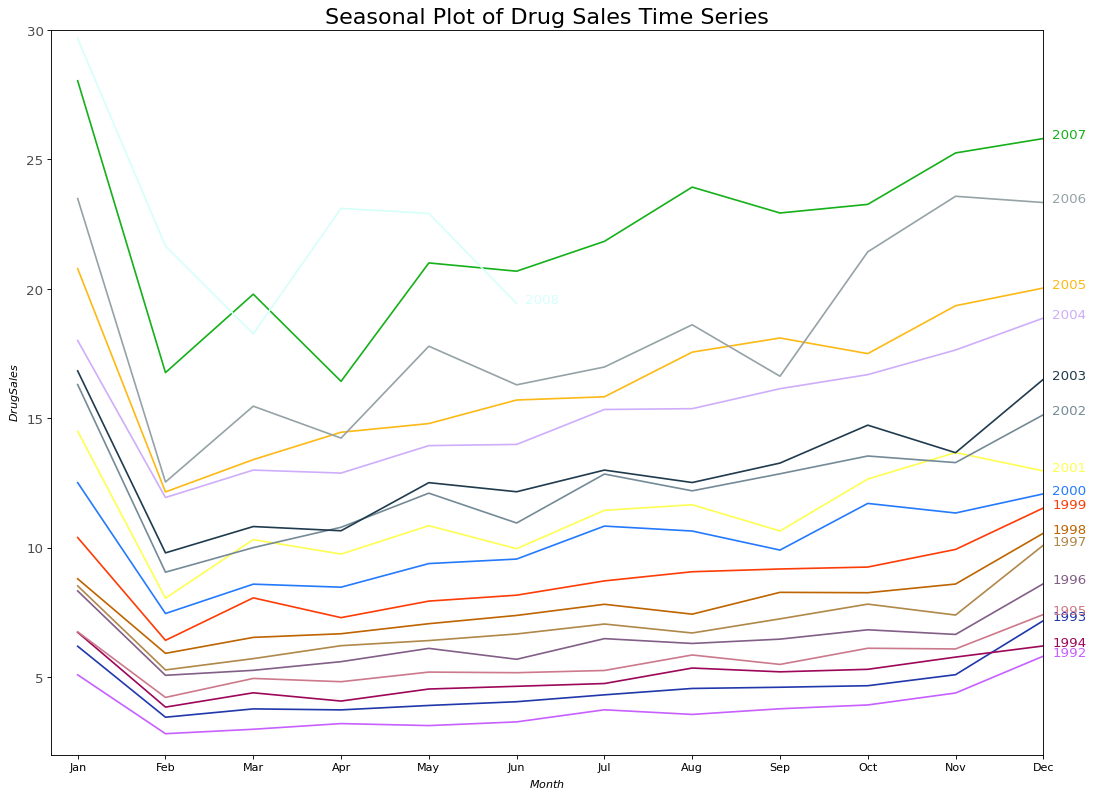

In [6]:
import matplotlib as mpl

yearly_dataset = df.copy()
yearly_dataset.reset_index(inplace=True)

# Prepare data
yearly_dataset['year'] = [d.year for d in yearly_dataset.date]
yearly_dataset['month'] = [d.strftime('%b') for d in yearly_dataset.date]
years = yearly_dataset['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=yearly_dataset.loc[yearly_dataset.year==y, :], color=mycolors[i], label=y)
        plt.text(yearly_dataset.loc[yearly_dataset.year==y, :].shape[0]-.9, yearly_dataset.loc[yearly_dataset.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

Nessa visualização também fica clara a tendência de crescimento da série ao longo de cada ano e podemos perceber também algumas sazonalidades, onde o mês de Fervereiro apresenta uma queda nas vendas e depois retoma o crescimento em Março, caindo novamente em Abril e normalmente repetindo esse padrão bimestral até o fim do ano, durante praticamente todos os anos.

Outra forma de visualizar a tendência e a sazonalidade da série pode ser realizada através de um gráfico de caixas, agrupando os dados de acordo com o mês e ano, comparando-os ao longo do tempo.

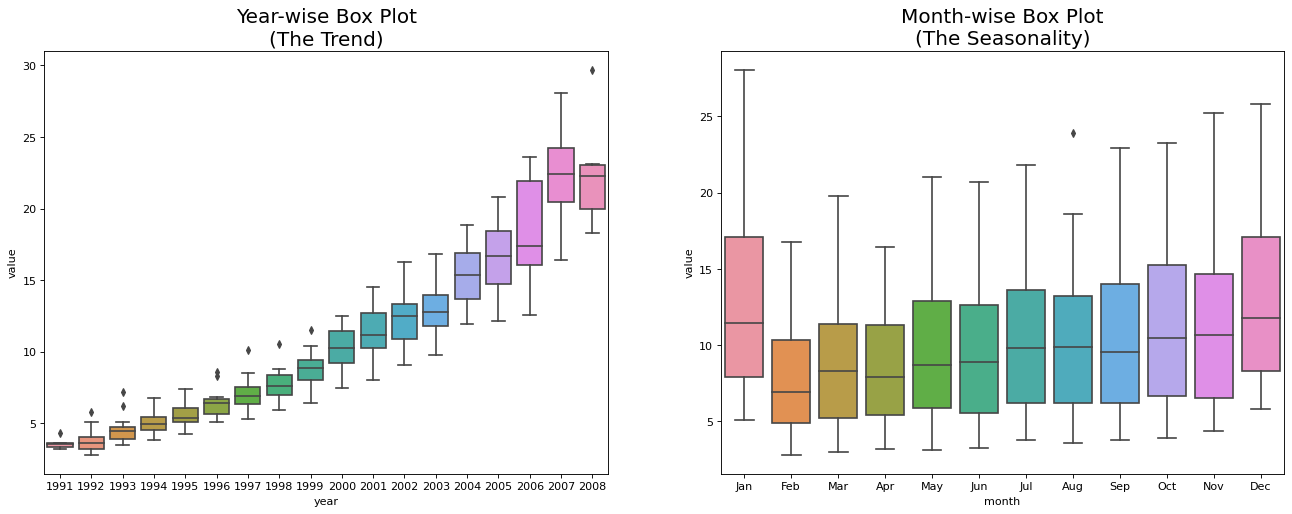

In [7]:
import seaborn as sns

# Import Data
box_dataset = df.copy()
box_dataset.reset_index(inplace=True)

# Prepare data
box_dataset['year'] = [d.year for d in box_dataset.date]
box_dataset['month'] = [d.strftime('%b') for d in box_dataset.date]
years = box_dataset['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=box_dataset, ax=axes[0])
sns.boxplot(x='month', y='value', data=box_dataset.loc[~box_dataset.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

Conhecer os dados e o contexto é importante para compreender o motivo de alguns comportamentos. Por exemplo, sabendo que Dezembro e Janeiro é uma temporada de descontos na Austrália, justifica o comportamento mais elevado nas vendas desses meses todos os anos.

## 1.4. Reconhecendo padrões: Tendência e Sazonalidade

As séries temporais possuem alguns padrões que podem ser observados conforme apresentado na seção anterior, como a Tendência e Sazonalidade. A tendência pode ser identificada quando se visualiza uma inclinação de crescimento ou decréscimo na série. Já a sazonalidade é identificada com um comportamento que se repete entre intervalos regulares de tempo, devido a fatores temporários que afetam o estado natural da série.

Nem todas as séries possuem esses padrões e eles podem ser identificados separadamente, ou seja, uma série pode possuir tendência sem sazonalidade, assim como o oposto, apresentar sazonalidade sem apresentar tendências. Também é possível uma série apresentar várias tendências ao longo do tempo, como o histórico de uma ação na bolsa de valores.

Uma série temporal pode ser imaginada como uma combinação de componentes: Base + Tendência + Sazonalidade + Resíduos. A seguir podemos observar exemplos de cada componente das séries.

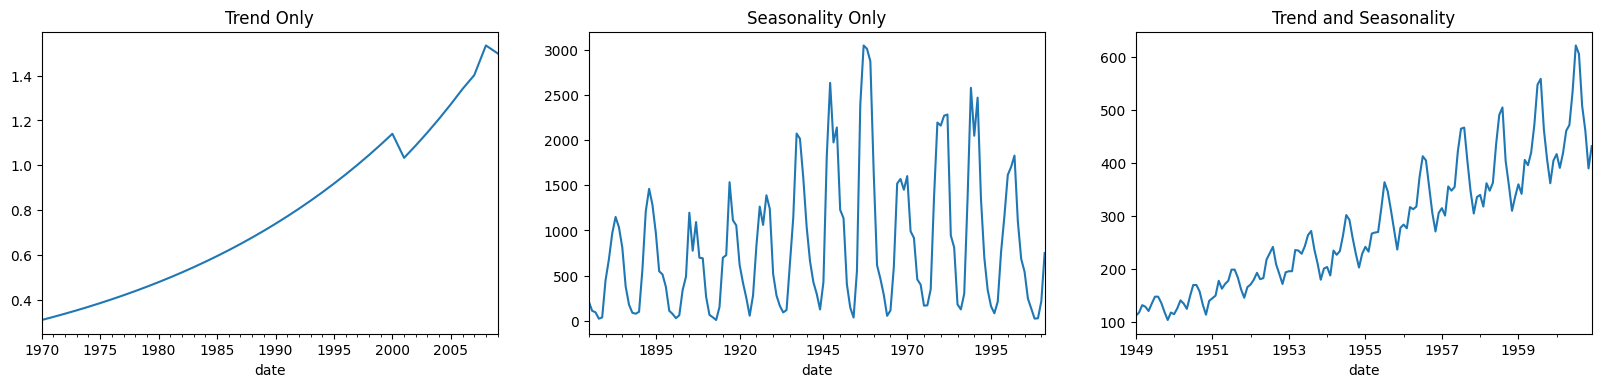

In [8]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

Em breve serão explicados os componentes e como obtê-los, mas antes de abordar esse tópico, é preciso compreender mais alguns detalhes sobre os padrões e propriedades de uma série temporal.

### 1.4.1. Comportamento cíclico ou sazonal?

Os padrões de variação dos valores de uma série temporal podem ocorrer de forma sazonal ou apenas de forma cíclica. Para identificar a diferença é preciso observar se as variações acontecem dentro de intervalos fixos do calendário. 

Caso não tenham esse comportamento, são variações cíclicas, porque diferente da sazonalidade, esses efeitos cíclicos normalmente são influenciados por fatores do negócio e fatores sócio-econômicos.

### 1.4.2. Séries aditivas e multiplicativas

Dependendo da natureza das tendências e sazonalidades encontradas em cada série, elas podem ser modeladas como aditivas ou multiplicativas, ou seja, cada observação da série pode ser representada como uma soma ou um produto dos seus componentes.

**Série Aditiva** = Base + Tendência + Sazonalidade + Resíduos

**Série Multiplicativa** = Base \* Tendência \* Sazonalidade \* Resíduos

## 1.5. Estrutura em componentes

Conforme mencionado, as séries temporais são formadas por quatro compoentes: Base, Tendência, Sazonalidade e Resíduos. A seguir vamos decompor a série temporal em cada componente, considerando as duas possibilidades, como uma série aditiva ou multiplicativa.

Para isso vamos utilizar a função `seasonal_decompose` disponível na biblioteca `statsmodels` do Python.

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Nessa função, o parâmetro `extrapolate_trend='freq'` é responsável por lidar com valores nulos da tendência e sazonalidade no início das séries. Agora vamos visualizar o resultado da decomposição

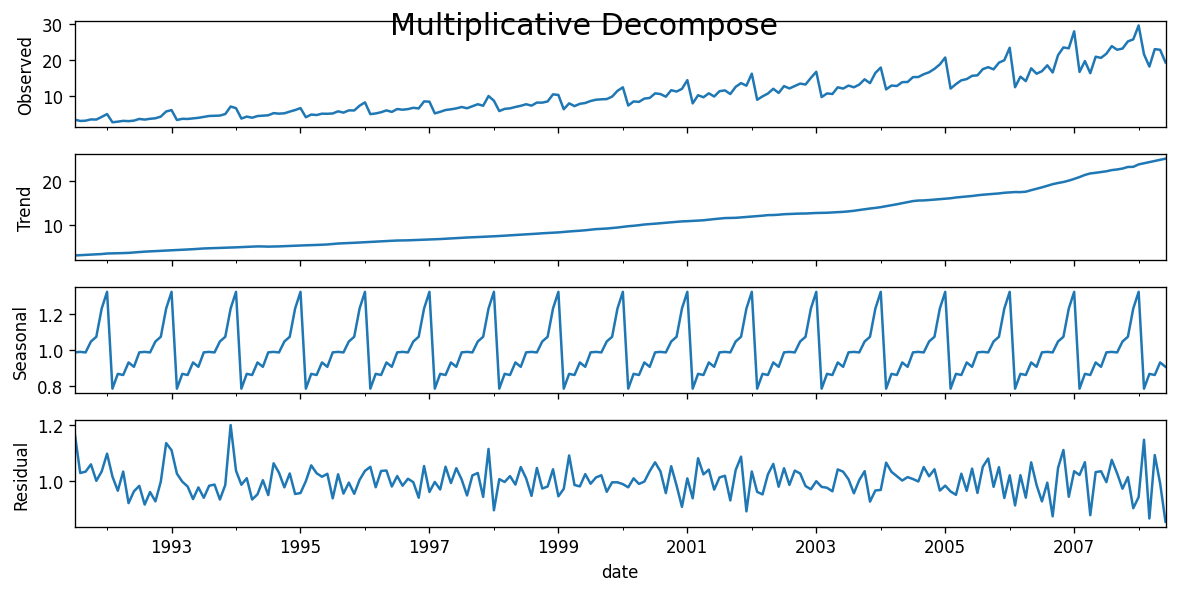

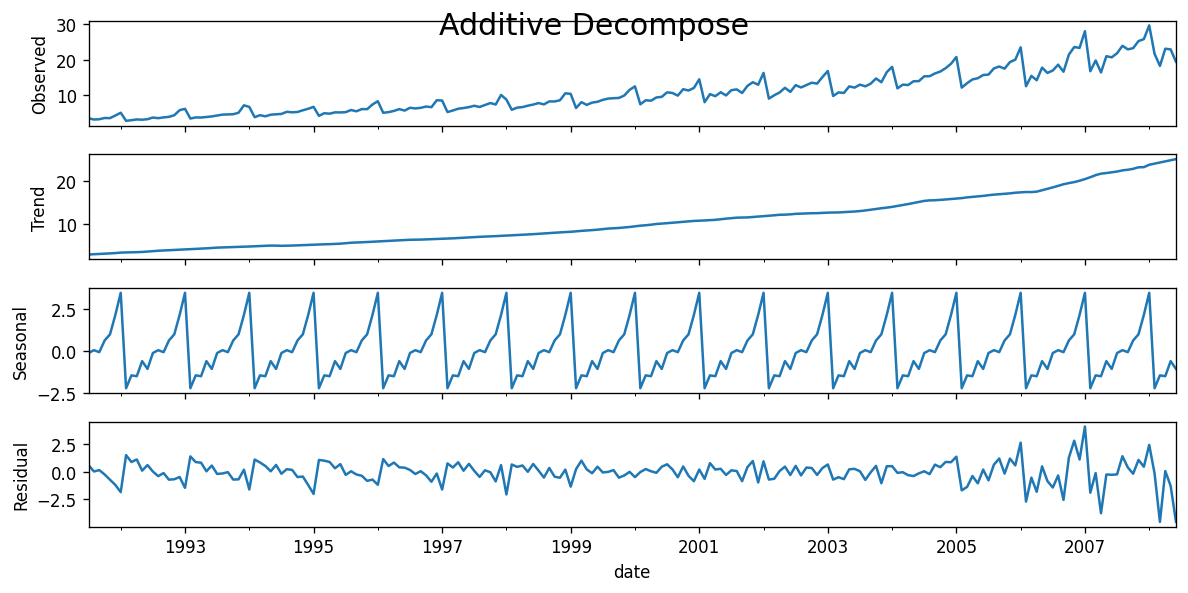

In [10]:
# Plot
plt.rcParams.update({'figure.figsize': (10,5)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=18)
result_add.plot().suptitle('Additive Decompose', fontsize=18)
plt.show()

Observando os resíduos das séries, podemos notar que a decomposição aditiva ainda apresenta alguns padrões que se repetem durante alguns intervalos de tempo, diferente da decomposição multiplicativa que apresenta um comportamento irregular, o que é esperado para esse componente.

Com base nas expectativas para cada componente, vamos seguir utilizando a decomposição múltipla para essa série. Os dados referentes à decomposição ficam disponíveis na variável `result_mul` e serão utilizados como uma fonte de dados a partir deste ponto.

In [11]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


# 2. Estado Estacionário e Não estacionário

O estado de uma série também é uma propriedade que determina se os valores são definidos em função do tempo ou não. Uma série estacionária 
é identificada quando temos a média, variância e auto correlação constantes ao longo do tempo.

Uma série temporal estacionária não possui efeitos sazonais ou tendências sendo a série ideal para se realizar predições.

É possível identificar esses estado apenas com observações visuais. A seguir estão alguns exemplos de como os gráficos se comportam em cada caso.

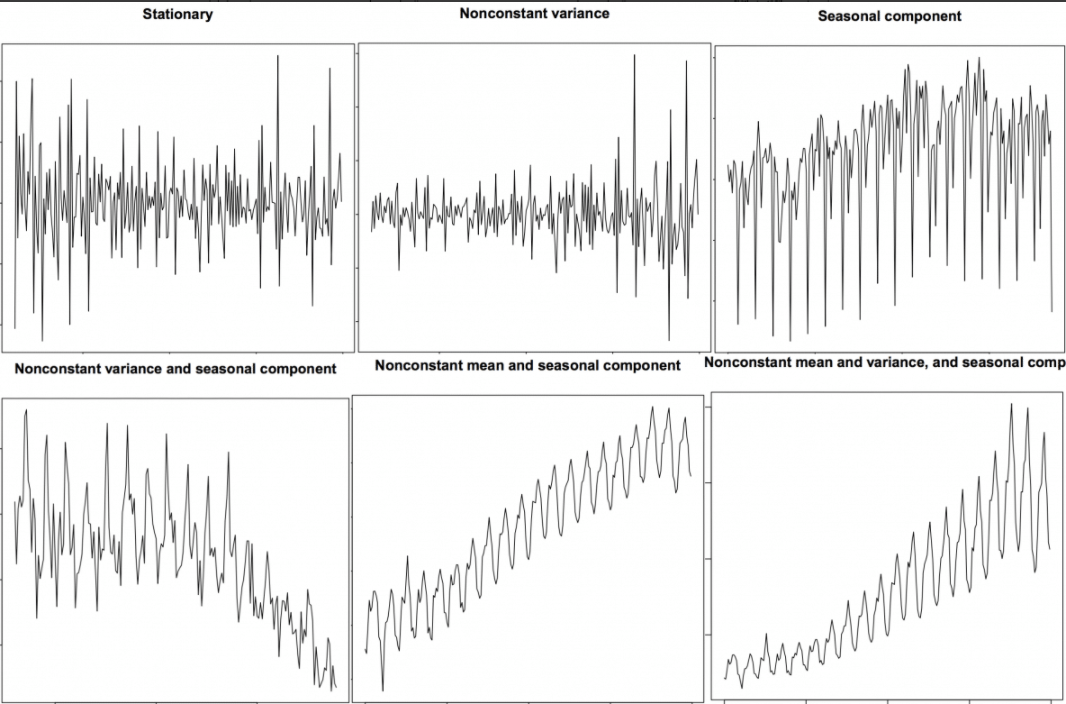

## 2.1. Transformando uma série não estacionária

Ao se deparar com uma série não estacionária, é preciso remover as variações para chegar a um estado estacionário que possibilite a predição dos valores. Para isso podem ser aplicadas várias técnicas de transformação já conhecidas:

- Diferenciação (Uma ou mais aplicações)
- Aplicar a uma função logarítmica
- Aplicar uma função de raiz
- Aplicar uma combinação de todas as anteriores

A técnica mais comum e mais simples é a da diferenciação, na qual são comparados os valores de cada instante com seu valor imediatamente anterior, ou seja: $Y = Y_{t} - Y_{t-1}$. Programaticamente, subtrai-se o próximo valor pelo valor atual na lista de valores da série. 

Para exemplificar, vamos utilizar o conjunto de dados $[1, 5, 2, 12, 20]$. Nesse exemplo, o resultado da primeira diferenciação seria:

$\large [5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]$

Já na segunda diferenciação, utiliza-se o resultado da primeira etapa e repete-se o mesmo processo, sendo assim, teremos: 

$\large [-3-4, -10-3, 8-10] = [-7, -13, -2]$

## 2.2. Porquê transformar uma série?

Como já foi mencionado anteriormente, as séries estacionárias possuem o estado ideal para se realizar predições. O motivo disso é que as predições são auto regressivas, ou seja, os modelos de regressão lineares utilizam os próprios deslocamentos da série como preditores. 

Esses deslocamentos são os comparativos de um instante com um instante em um intervalo anterior da série, como o resultado do processo de diferenciação por exemplo.

Uma das características mais importantes das regressões lineares é que elas funcionam melhor quando os preditores não estão correlacionados entre si, ou seja, quando a série é estacionária, ela está em um estado que o momento atual não depende do anterior.

A transformação não torna uma série totalmente estacionária, mas cria um estado muito próximo para que possam ser aplicados modelos lineares relativamente simples para as predições.

## 2.3. Verificando o estado da série

Apesar de ser possível identificar visualmente o estado de uma série, existem técnicas para se testar precisamente o quanto uma série é ou não estacionária, que além de identificar seu estado, são utilizadas para validar se as transformações realizadas foram bem sucedidas. Algumas dessas técnicas estão listadas a seguir:

- Augmented Dickey Fuller (ADF)
- Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
- Philips Perron test (PP)

O teste mais comum é o ADF, que consiste em um teste estatístico no qual a hipótese nula diz que a série é não estacionária, dessa forma, se a probabilidade (P-value) do teste for menor que 5% (0.05), a hipótese nula será rejeitada confirmando que a série é estacionária, contando com um intervalo de confiança como parte do resultado.

Já o teste KPSS é utilizado para validar o estado estacionário das tendências. A hipótese nula e a probabilidade (P-valie) são o oposto do teste ADF.

Os dois testes estão presentes na biblioteca do Python `statsmodels.tsa.stattools` e serão implementados a seguir para comparação

In [12]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.value.values, regression='c', lags='auto')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.14518568930674
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476

KPSS Statistic: 2.013126
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


Observando os resultados de cada teste, podemos comprovar que a série original de fato é não estacionária. A probabilidade do teste ADF foi de 100% (1.0) e não rejeitou a hipótese nula, uma vez que esperava-se uma probabilidade menor que 5% (0.05). Já no teste KPSS, de forma inversa, a probabilidade para rejeitar a hipótese nula deveria ser de 95% (0.95).

## 2.4. Diferença entre Ruído e Série Estacionária

Assim como uma série estacionária, os ruídos também não são determinados em função do tempo, mas diferente da série estacionária, são completamente aleatórios e possuem a média igual a zero e não apresentando um padrão claro. Matematicamente, uma sequencia de números completamente aleatórios com média zero é um ruído, como pode ser 

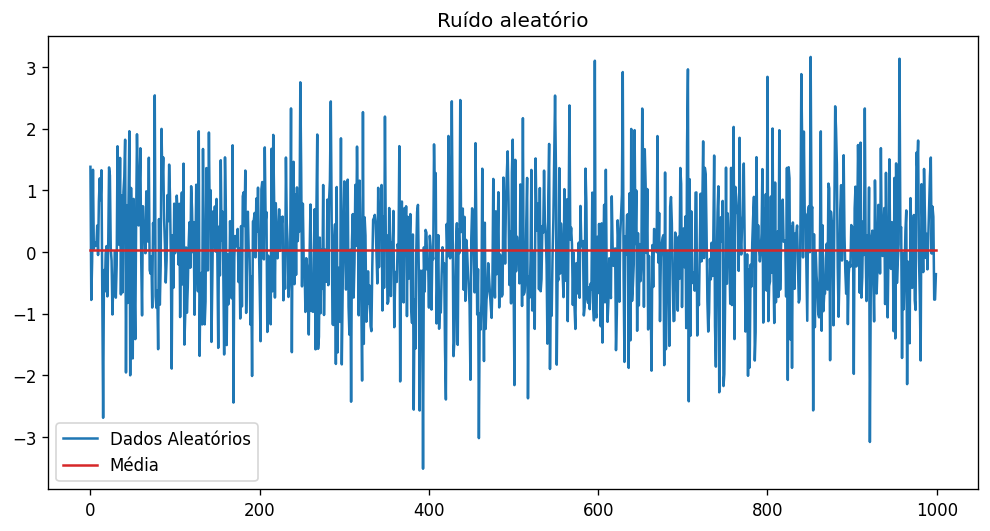

In [13]:
randvals = np.random.randn(1000)
plt.plot(randvals, color='tab:blue', label='Dados Aleatórios')
plt.plot([np.mean(randvals)]*len(randvals), color='tab:red', scalex=True, label='Média')
plt.title('Ruído aleatório')
plt.legend()
plt.show()

# 3. Lidando com Tendência, Sazonalidade e Valores Nulos

## 3.1. Removendo a Tendência

Remover a tendência de uma série temporal significa remover um dos componentes que estão presentes na série. Para isso existem algumas técnicas possíveis:

- Subtrair o resultado de um modelo linear treinado com base nos períodos como preditores (Tendências mais complexas podem exigir uma um modelo quadrático ou até mesmo cúbico)
- Subtrair a tendência obtida através da decomposição
- Subtrair a média
- Aplicar os filtros Baxter-King (`statsmodels.tsa.filters.bkfilter`) ou Hodrick-Prescott(`statsmodels.tsa.filters.hpfilter`) para remover a média móvel ou os efeitos cíclicos.

Para simnplificar, vamos utilizar apenas os dois primeiros métodos, que podem ser aplicados com o `scipy` e com a decomposição aplicada anteriormente através do `statmodels`.

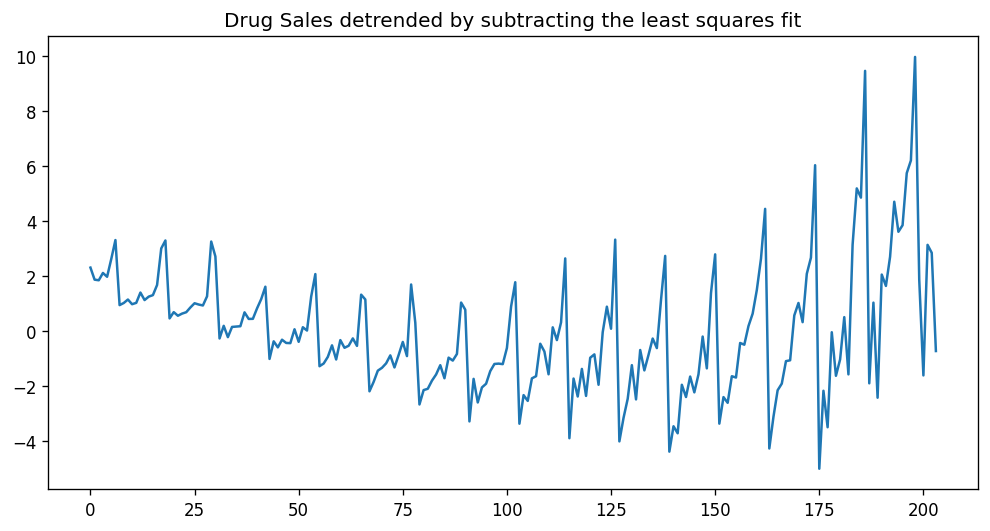

In [14]:
# Usando scipy: Subtraindo o resultado do treinamento de um modelo linear
from scipy import signal
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit')
plt.show()


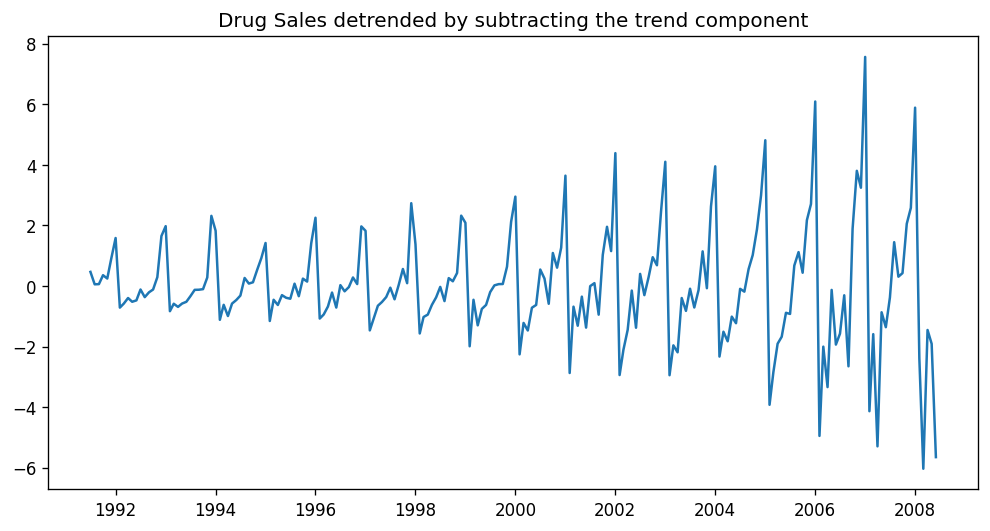

In [15]:
# Usando statmodels: Subtraindo o componenente de tendência da decomposição anterior.
detrended = df.value.values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component')
plt.show()

## 3.2. Como testar a sazonalidade

Assim como o estado de uma série temporal, é possível identificar a sazonalidade de forma visual, apenas observando o gráfico da série, mas para garantir uma maior precisão, podemos utilizar uma função de auto correlação e observar o gráfico dessa função para se obter maiores detalhes.

Quando existir um padrão de sazonalidade, o gráfico da função irá revelar as ocorrências dentro de um determinado intervalo de tempo. Para visualizar esse gráfico, basta usar a função de auto correlação do Pandas:

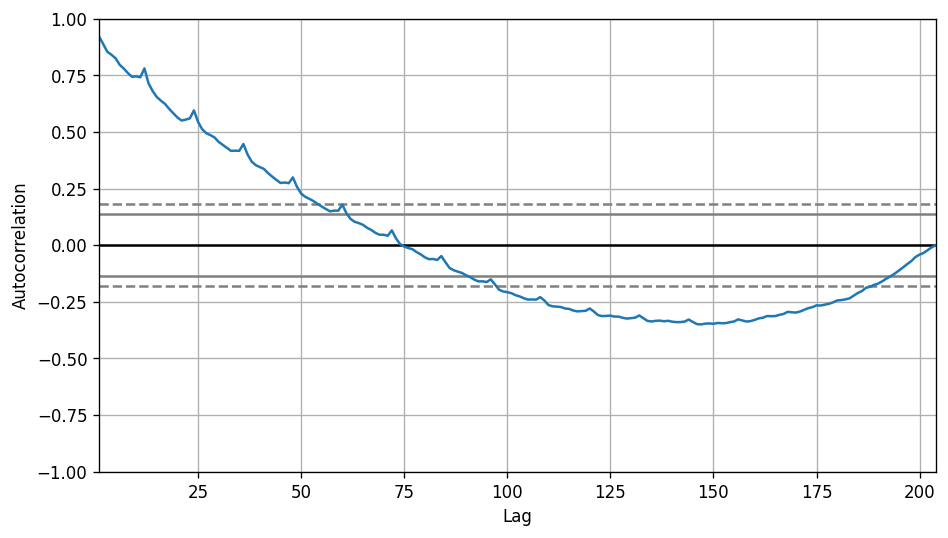

In [16]:
from pandas.plotting import autocorrelation_plot
# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.value.tolist())
plt.show()

Para a base de dados de exemplo, como visualizada anteriormente, a sazonalidade aparece a cada 12 meses, ou seja, nos momentos 12, 24, 36, etc. Apesar do exemplo ter sido claro para visualizar o padrão, é preciso ter muita atenção na análise de séries temporais com padrões de sazonalidade complexos ou que podem estar distorcidos por ruídos.

## 3.3. Removendo a Sazonalidade

Assim como a tendêndcia, existem várias formas de se realizar esse processo. Algumas delas são:

- Identificar a janela de sazonalidade a partir da média móvel. This will smoothen in series in the process.
- Subtrair uma janela sazonal anterior da janela atual.
- Dividir a série pelo componente sazonal identificado na decomposição da série.

Como já realizamos a decomposição da série, vamos aplicar a terceira opção, dividindo a série pelo componente sazonal.


[]

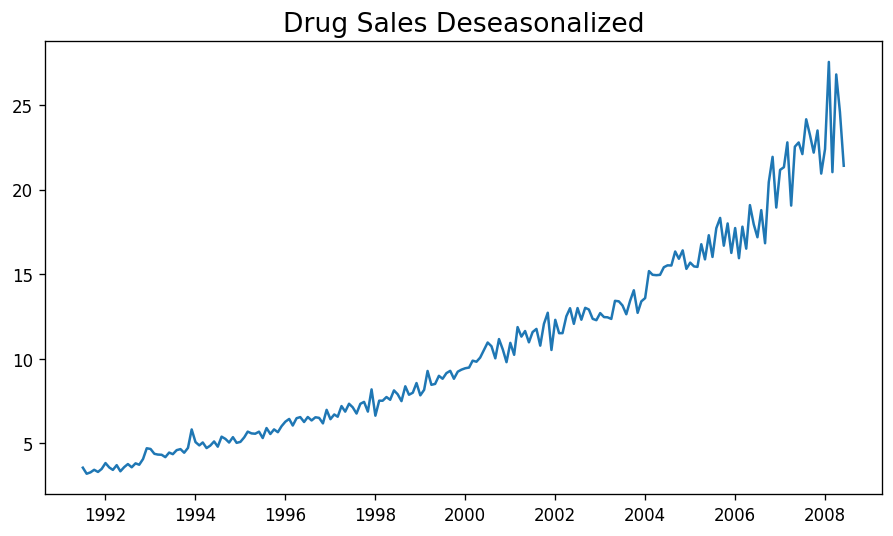

In [17]:
# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

## 3.4. Suavizando uma série temporal

A suavização é um método utilizado para reduzir os efeitos de ruídos e aproximar o máximo possível de uma série limpa, sem ruídos. Uma grande vantagem de se aplicar a suavização é a possíbilidade de expor tendências que estão presentes intrinsecamente nas séries e não são triviais de serem identificadas pelos métodos adotados até o momento ou por observações visuais. Além disso a versão suavizada pode ser utilizada como uma nova característica que explica a própria série original.

Para suavizar uma série, podemos utilizar qualquer um dos métodos a seguir:
- Aplicar a média móvel
- Aplicar uma Regressão Localizada (LOESS)
- Aplicar uma Regressão Localizada Ponderada (LOWESS) 

A suavização por média móvel é a média dos períodos anteriores definida por uma janela temporal. Essa janela é difinida e precisa estar de acordo com as características apresentadas pela série, pois, se uma janela muito grande for definida, a série será suavizada em excesso e anulará os efeitos de sazonalidade existentes, perdendo seus comportamentos originais.

Os outros dois métodos são similares e utilizam regressões dos vizinhos próximos de cada ponto. Eles podem ser aplicados a partir do pacote `statsmodels.nonparametric.smoothers_lowess`, onde é possível definir o percentual de dados que serão utilizados como vizinhos. Para demonstrar os métodos na prática vamos utilizar uma nova base de dados, aplicando a média móvel e o LOWESS com pesos de 5% e 15%.

In [38]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
smooth_dataset_url = 'https://raw.githubusercontent.com/selva86/datasets/master/elecequip.csv'
df_smooth = pd.read_csv(smooth_dataset_url, parse_dates=['date'], index_col='date')

# 1. Moving Average (rolling window = 3)
df_ma = df_smooth.value.rolling(3, center=True, closed='both').mean()

# 2. Lowess Smoothing (5% and 15%)
df_lowess_5 = pd.DataFrame(lowess(df_smooth.value, np.arange(len(df_smooth.value)), frac=0.05)[:, 1], index=df_smooth.index, columns=['value'])
df_lowess_15 = pd.DataFrame(lowess(df_smooth.value, np.arange(len(df_smooth.value)), frac=0.15)[:, 1], index=df_smooth.index, columns=['value'])

Com todos o métodos aplicados, podemos visualizar as diferenças entre eles e comparar os resultados:

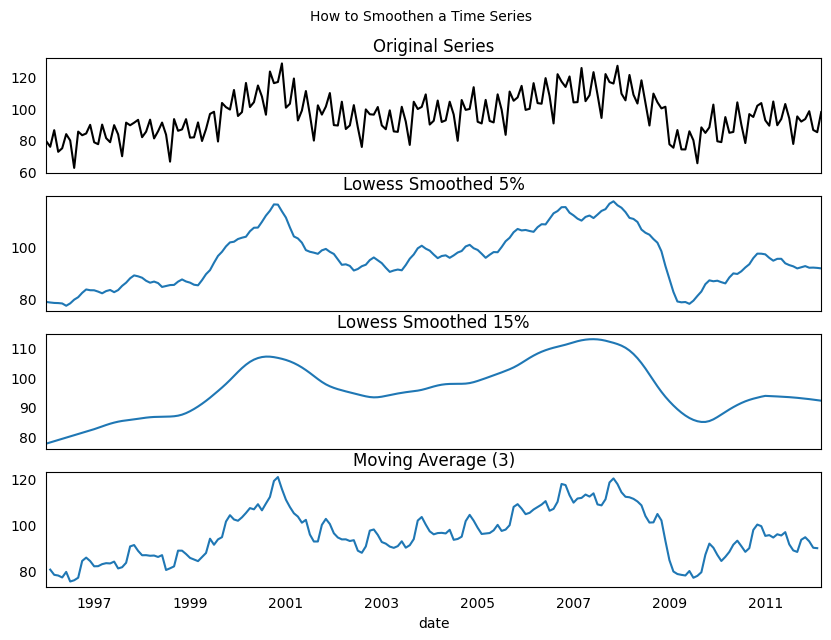

In [41]:
# Plot
fig, axes = plt.subplots(4,1, figsize=(10, 7), sharex=True, dpi=100)
df_smooth['value'].plot(ax=axes[0], color='k', title='Original Series')
df_lowess_5['value'].plot(ax=axes[1], title='Lowess Smoothed 5%')
df_lowess_15['value'].plot(ax=axes[2], title='Lowess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=10)
plt.show()

## 3.5. Como tratar valores nulos

As séries temporais têm uma particularidade em um cenário de valores nulos ou inexistentes. Em uma base de dados tabular, uma solução comum é o preenchimento desses valores com a média da distribuição. Nesse contexto temporal, utilizar a média significa replicar comportamentos de tendências ou sazonalidades ao longo da série, gerando ruídos, quando não deveriam interferir na distribuição original dos dados.

Quando não existem dados para alguns períodos, seja por falha no registro ou por não ter sido disponibilizado, uma solução é a atualização com valores zerados, considerando que a leitura foi realizada mas não havia valor.

Para verificar o desempenho da primeira opção, vamos aplicar o preenchimento com Zeros em uma base onde, propositalmente, foram removidos alguns valores e verificar o MSE da série comparada com os valores da série original:



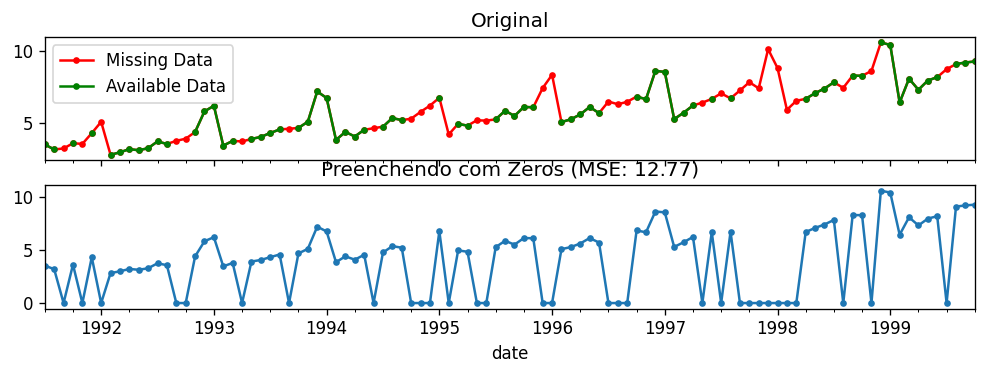

In [18]:
from sklearn.metrics import mean_squared_error

df_orig = df.head(100)
missing_df_url = 'https://raw.githubusercontent.com/selva86/datasets/master/a10_missings.csv'
df_missing = pd.read_csv(missing_df_url, parse_dates=['date'], index_col='date')

def setup_comparison_plot(methods, height=3):
  fig, axes = plt.subplots(methods, 1, sharex=True, figsize=(10, height))
  plt.rcParams.update({'xtick.bottom' : False})
  return fig, axes, plt

def plot_original_data(axes, pos=0):
  ## Original -------------------------------
  df_orig.plot(title='Original', ax=axes[pos], label='Original', color='red', style=".-")
  df_missing.plot(title='Original', ax=axes[pos], label='Original', color='green', style=".-")
  axes[pos].legend(["Missing Data", "Available Data"])


def plot_filling_zeros(axes, pos=1):
  ## Preenchendo com Zeros ------------------
  df_zfill = df_missing.fillna(value=0)
  error = np.round(mean_squared_error(df_orig['value'], df_zfill['value']), 2)
  df_zfill['value'].plot(title='Preenchendo com Zeros (MSE: ' + str(error) +")", ax=axes[pos], label='Preenchendo com Zeros', style=".-")


fig, axes, plt = setup_comparison_plot(2)
plot_original_data(axes)
plot_filling_zeros(axes)
plt.show()

Outras soluções possíveis e mais elaboradas estão descritas abaixo, com exemplos de aplicação em código. Ao fim, veremos um comparativo entre elas e assim possibilitsar a escolha da melhor opção.



- Forward Fill
- Backward Fill
- Linear Interpolation
- Quadratic interpolation
- Mean of nearest neighbors
- Mean of seasonal couterparts

### 3.5.1. Forward Fill e Backward Fill

Essas opções de preenchimento estão disponíveis nativamente no pandas e são simples de se utilizar. Elas consistem em replicar os valores imediatamente anteriores ou posteriores da série para os intervalos ausentes, de acordo com a direção desejada.

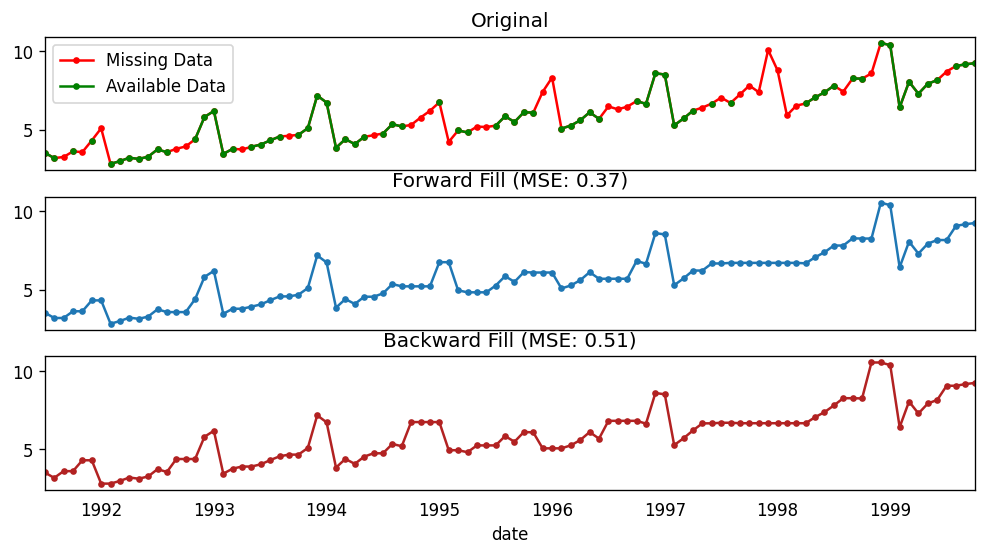

In [19]:
def plot_forward_fill(axes, pos=1):
  ## Forward Fill --------------------------
  df_ffill = df_missing.ffill()
  error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
  df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[pos], label='Forward Fill', style=".-")

def plot_backward_fill(axes, pos=1):
  ## Backward Fill -------------------------
  df_bfill = df_missing.bfill()
  error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
  df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[pos], label='Back Fill', color='firebrick', style=".-")


fig, axes, plt = setup_comparison_plot(3, 5)
plot_original_data(axes, 0)
plot_forward_fill(axes, 1)
plot_backward_fill(axes, 2)
plt.show()

### 3.5.2. Interpolação

Essa opção utiliza uma função de aproximação que utiliza os valores conhecidos para encontrar as lacunas de acordo com a opção escolhida. Para aplicar esse método, utilizamos a função `interp1d` da biblioteca `scipy.interpolate`. Na [documentação](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) pode-se observar que existem várias opções de interpolação nos detalhes do parâmetro `kind`. Para exemplificar, serão utilizadas três opções: `linear`, `quadratic` e `cubic`. Além da documentação da API, é possível ler o [material de referência](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html) para conhecer mais detalhes sobre o método.

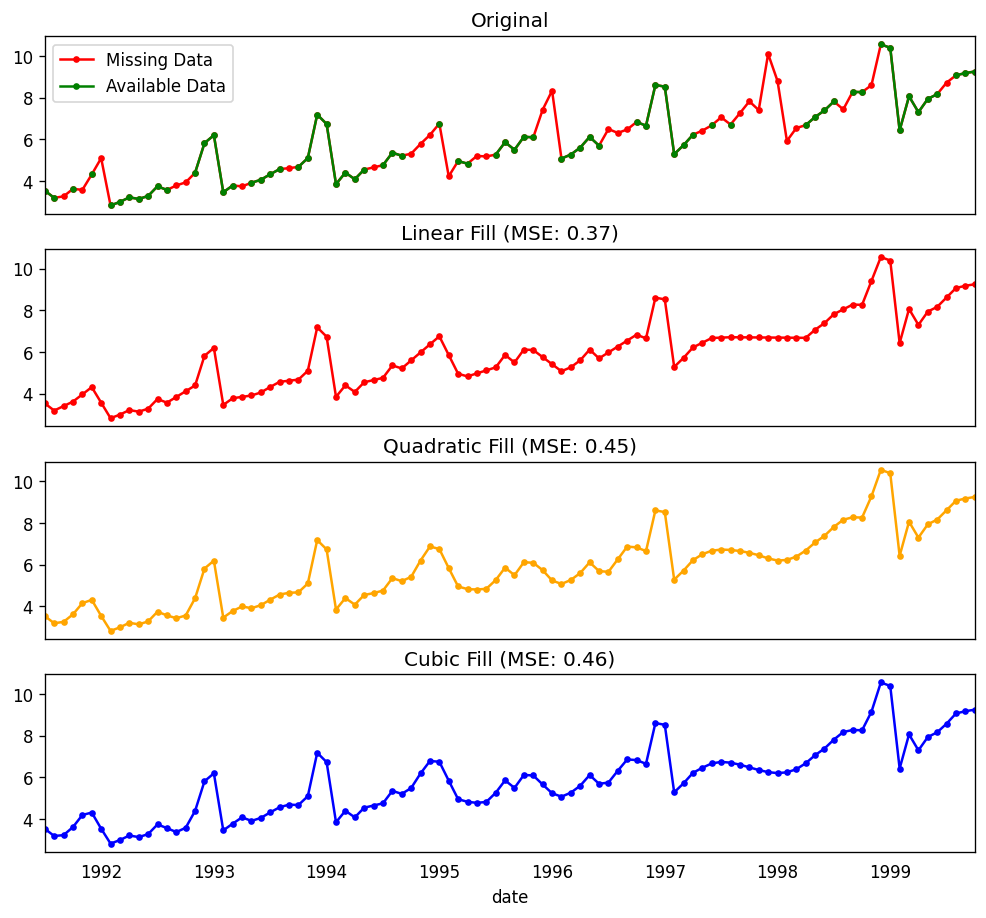

In [20]:
from scipy.interpolate import interp1d

def plot_interpolation(axes, pos=1, kind="linear", color='red'):
  ## Interpolation --------------------
  col_name= f"{kind}_fill"
  label= f"{kind.capitalize()}"
  df_interpolated = df_missing.copy()
  df_interpolated['rownum'] = np.arange(df_interpolated.shape[0])
  df_nona = df_interpolated.dropna(subset = ['value'])
  f2 = interp1d(df_nona['rownum'], df_nona['value'], kind=kind)
  df_interpolated[col_name] = f2(df_interpolated['rownum'])
  error = np.round(mean_squared_error(df_orig['value'], df_interpolated[col_name]), 2)
  df_interpolated[col_name].plot(title=f"{label} Fill (MSE: {str(error)})", ax=axes[pos], label=f"{label} Fill", color=color, style=".-")

fig, axes, plt = setup_comparison_plot(4, 9)
plot_original_data(axes, 0)
plot_interpolation(axes, 1, 'linear', 'red')
plot_interpolation(axes, 2, 'quadratic', 'orange')
plot_interpolation(axes, 3, 'cubic', 'blue')
plt.show()

### 3.5.3. Médias

Como mencionado no início da seção, preencher as lacunas com média da distribuição não é indicada, porém, existem outras formas de se utilizar a média nesses casos, levando em consideração as características da série e os registros dos intervalos próximos às lacunas. Esses métodos garantem que não serão criados ruídos e os complementos serão adequados ao início e fim de cada lacuna.

#### 3.5.3.1. Média dos K Vizinhos anteriores mais Próximos

Como o nome do método sugere, encontra os K vizinhos anteriores à lacuna que precisa ser preenchida e calcula a média desses valores anteriores.

In [21]:
def knn_mean(ts, k):
  # ts: 1D array-like of the time series
  # k: number of Nearest Past Neighbors
  out = np.copy(ts)
  for i, val in enumerate(ts):
      if np.isnan(val):
          k_by_2 = np.ceil(k/2)
          lower = np.max([0, int(i-k_by_2)])
          upper = np.min([len(ts)+1, int(i+k_by_2)])
          ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
          out[i] = np.nanmean(ts_near)
  return out

def plot_knn_mean(axes, pos=1):
  df_missing['knn_mean'] = knn_mean(df_missing.value.values, 8)
  error = np.round(mean_squared_error(df_orig['value'], df_missing['knn_mean']), 2)
  df_missing['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[pos], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

#### 3.5.3.2. Média Sazonal

Calcula a média correspondente aos períodos sazonais identificados na série temporal de acordo com a janela sazonal identificada anteriormente. Para o nosso exemplo, a janela encontrada foi de 12 meses.

In [22]:
## Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
  # ts: 1D array-like of the time series
  # n: Seasonal window length of the time series
  out = np.copy(ts)
  for i, val in enumerate(ts):
      if np.isnan(val):
          ts_seas = ts[i-1::-n]  # previous seasons only
          if np.isnan(np.nanmean(ts_seas)):
              ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
          out[i] = np.nanmean(ts_seas) * lr
  return out

def plot_seasonal_mean(axes, pos=1):
  df_missing['seasonal_mean'] = seasonal_mean(df_missing.value, n=12, lr=1.25)
  error = np.round(mean_squared_error(df_orig['value'], df_missing['seasonal_mean']), 2)
  df_missing['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[pos], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")

Com as funções de média criadas, vamos comparas os resultados:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


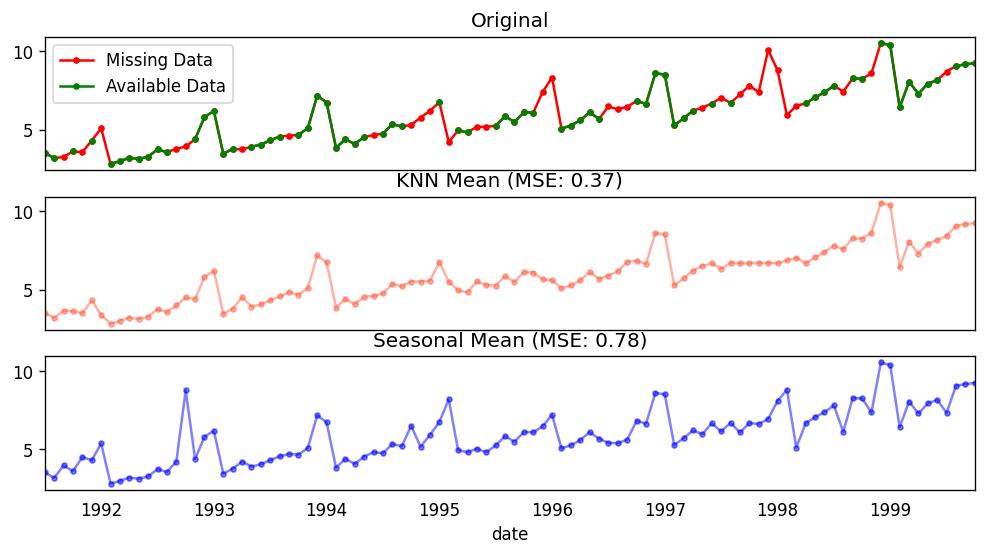

In [23]:
fig, axes, plt = setup_comparison_plot(3, 5)
plot_original_data(axes, 0)
plot_knn_mean(axes, 1)
plot_seasonal_mean(axes, 2)
plt.show()

# 4. Deslocamentos (Lags) e Autocorrelação

Quando dados estão correlacionados em uma base de dados, significa que eles podem ser descritos um em função do outro. No caso das séries temporais, a função de auto correlação (ACF) é definida entre diferentes intervalos de tempo, chamados *lags* ou deslocamentos. Quando uma série tem uma auto correlação considerável, significa que é possível prever os valores atuais e futuros a partir dos valores anteriores.

Além disso, existe uma outra função conhecida como Auto Correlação Parcial (PACF) que também contribui para a validação dos preditores da série, porém ela é uma correlação pura entre a série e um deslocamento específico, desconsiderando os deslocamentos intermediários.

Para encontrar essas duas correlações, podemos utilizar a biblioteca `statsmodels.tsa.stattools` conforme demostrado a seguir:

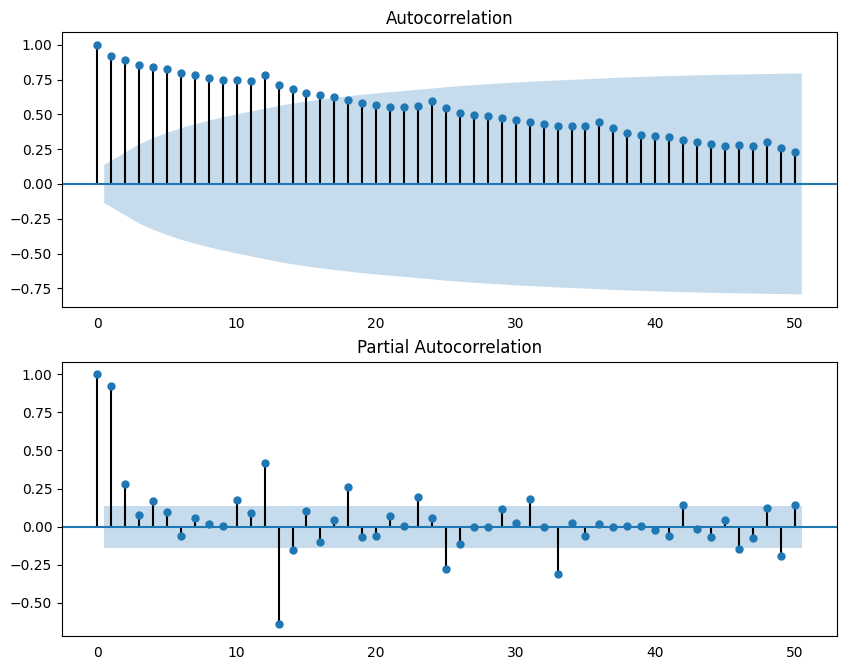

In [24]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculando as funções ACF e PACF até 50 deslocamentos
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(2,1,figsize=(10,8), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])
plt.show()

Explicando a função de auto correlação parcial matematicamente, temos a função PACF do deslocamento k como o coeficiente da equação de autoregressão de Y, representada por uma regressão linear de Y com seus próprios deslocamentos como preditores. 

Dessa forma, sendo esta a equação de autoregressão:

$\large Y_{t} = \alpha_{0} + \alpha_{1}Y_{t-1} + \alpha_{2}Y_{t-2} + \alpha_{3}Y_{t-3}$

Temos $Y_{t}$ como a série no momento atual, $Y_{t-1}$ representando o deslocamento 1 de Y e $Y_{t-3}$ como o deslocamento 3 de Y, com $\alpha_{3}$ representando o PACF.

A autocorrelação de uma série pode ser verificada através de um gráfico de dispersão entre ela própria e um deslocamento. A seguir estão alguns gráficos de deslocamento da série de exemplo: 

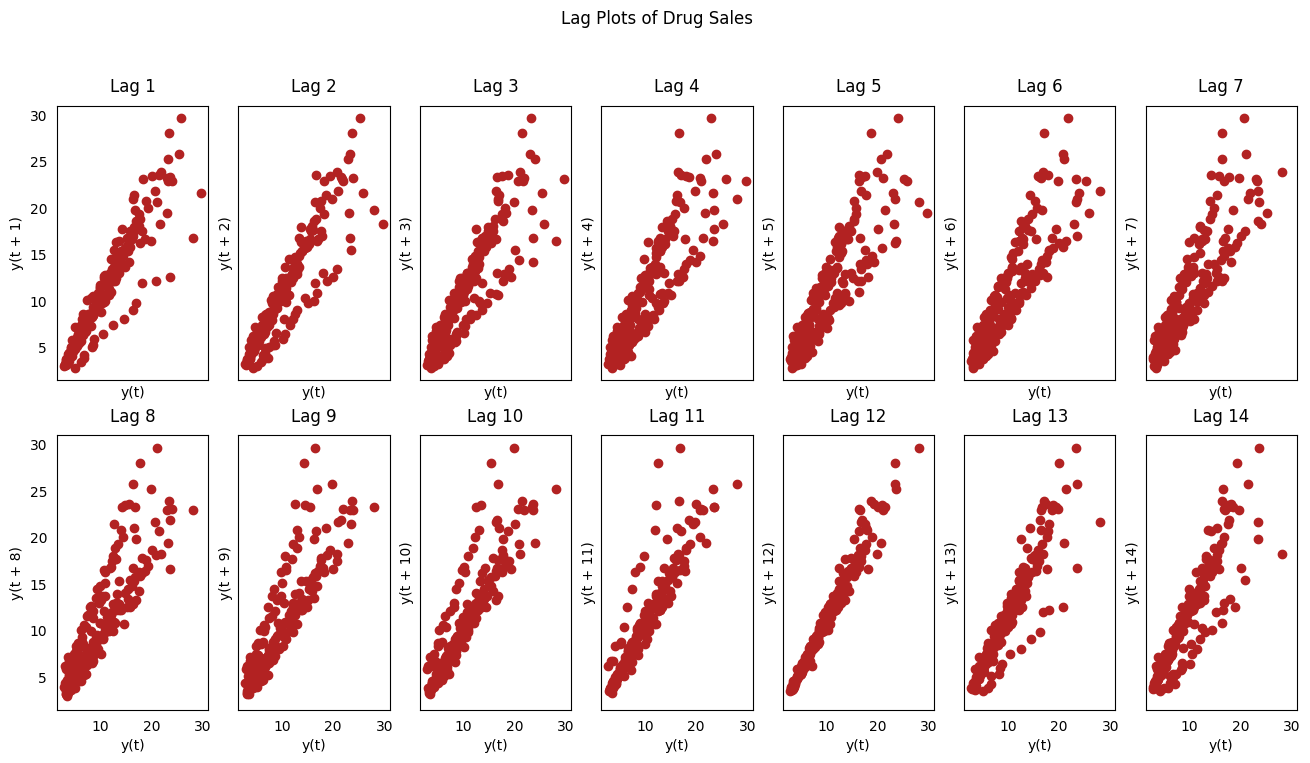

In [25]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

a10 = df.copy()

fig, axes = plt.subplots(2, 7, figsize=(16,8), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:14]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1)    
plt.show()

Se a série demonstrar um comportamento similar ao apresentado acima, se concentrando à medida que aumentam os deslocamentos analizados, a série é auto correlacionada. Caso contrário, a série é composta por ruídos inofensivos. para demonstrar de forma mais clara, podemos visualizar a evolução do gráfico de dispersão em uma outra base de dados, como essa base de áreas com focos de luz solar.

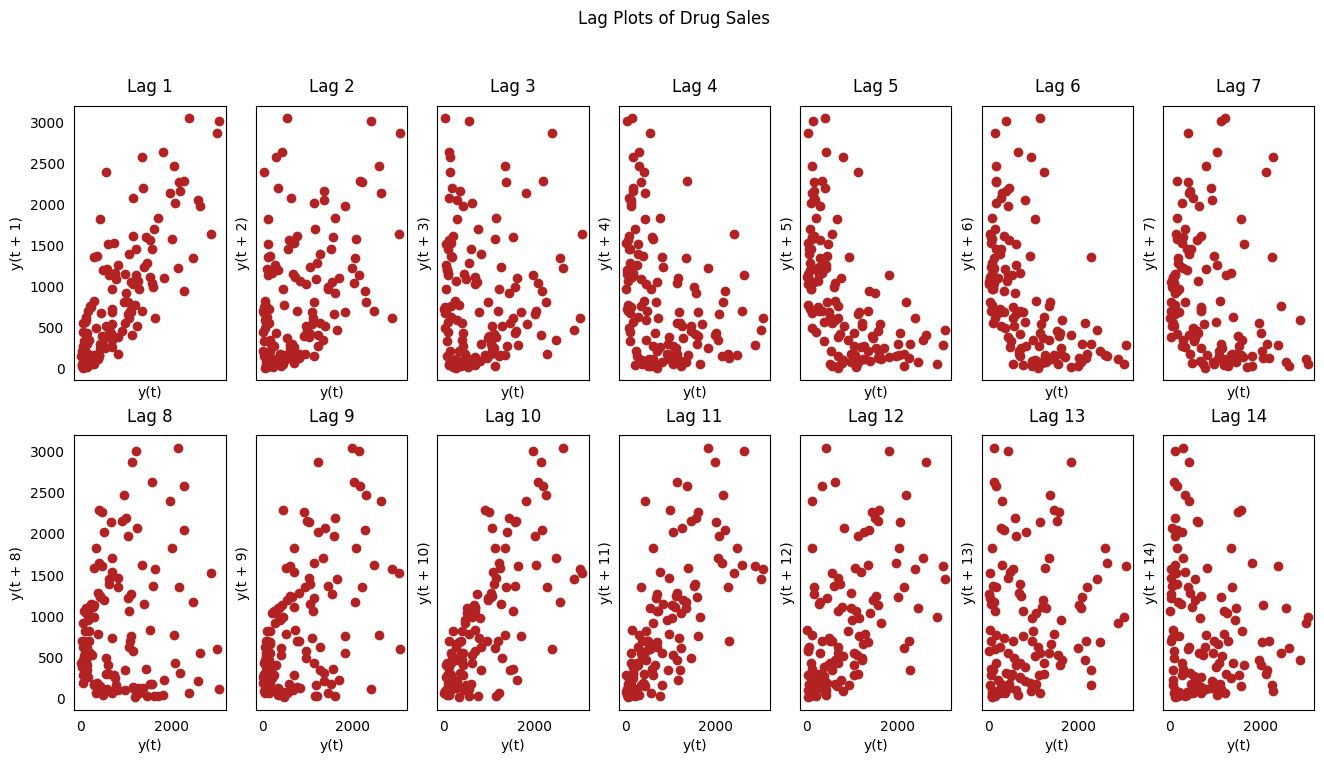

In [26]:
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import
ss = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv')

fig, axes = plt.subplots(2, 7, figsize=(16,8), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:14]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1)    
plt.show()

Para essa base podemos observar como os dados se dispersam à medida que aumentamos os deslocamentos analizados, sendo assim, essa série possui uma menor correlação entre os intervalos de tempo.

# 5. Predições em séries temporais

Na última seção, encontrarmos as características de auto correlação de uma série temporal e entendemos que elas nos indicam sobre a como os valores de intervalos anteriores podem contribuir para predizer os valores atuais. Avançando na identificação da previsibilidade de uma série, podemos utilizar duas medidas quantitativas para determinar o quanto uma série é previsível ou não.

As medidas têm como objetivo quantificar a regularidade e imprevisibilidade das oscilações da série, pois quanto mais padrões regulares e repetittivos a série apresentar, mais fácil pode-se realizar uma predição. A seguir vamos medir e comparar cada uma delas. Para maiores detalhes sobre como as medidas são encontradas, estão disponíveis links da internet com informações complementares.


## 5.1. Entropia Aproximada

Quanto maior o resultado do cálculo da [Entropia Aproximada](https://en.wikipedia.org/wiki/Approximate_entropy), mais difícil é de se realizar predições para a série. Para exemplificar, vamos criar a função que calcula a entropia e aplicá-la na nossa série de exemplo e novamente comparar com a série das áreas com focos de luz solar.

In [29]:
# https://en.wikipedia.org/wiki/Approximate_entropy
rand_small = np.random.randint(0, 100, size=36)
rand_big = np.random.randint(0, 100, size=136)

def ApproximateEntropy(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

Comparando os valores da entropia aproximada para algumas bases distintas temos os resultados a seguir:


In [30]:
# Nossa base de dados de exemplo
print(ApproximateEntropy(df.value, m=2, r=0.2*np.std(df.value)))     # 0.537
# Dados de áreas com focos de luz
print(ApproximateEntropy(ss.value, m=2, r=0.2*np.std(ss.value)))     # 0.651
# Série temporal aleatória com poucos dados
print(ApproximateEntropy(rand_small, m=2, r=0.2*np.std(rand_small))) # 0.152
# Série temporal aleatória com muitos dados
print(ApproximateEntropy(rand_big, m=2, r=0.2*np.std(rand_big)))     # 0.634

0.5374775224973489
0.6514704970333534
0.15261553914663306
0.6346454198608056


Podemos observar na comparação dos resultados que eles estão coerentes com as análises de auto correlação indicando que a série de focos de luz é menos propícia para utilizar os valores passados nas predições, uma vez que ela obteve um fator de previsibilidade maior que a base de exemplo.

Além disso, pode-se notar que a série aleatória com poucos dados obteve um fator muito baixo, indicando que a série tem uma alta previsibilidade, porém, por se tratar de uma série aleatória, dificilmente esse resultado está correto e não corresponde com a realidade da série.

Isso ocorre porque essa medida não consegue quantificar a previsibilidade da série com precisão quando tem poucos dados disponíveis. Esse problema pode ser tratado com outra medida, chamada Entropia de Amostragem, que será explicada a seguir.



## 5.2. Entropia de Amostragem

A [Entropia de Amostragem](https://en.wikipedia.org/wiki/Sample_entropy) é similar à anterior, porém consegue lidar com séries de poucos dados e evitar que ocorram quantificações e interpretações erradas sobre uma determinada distribuição. Vamos criar a função que calcula essa medida.

In [32]:
def SampleEntropy(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

Com a função de medida criada, vamos aplicá-la nas mesmas bases utilizadas anteriormente e comparar os resultados.

In [34]:
# Nossa base de dados de exemplo
print(SampleEntropy(df.value, m=2, r=0.2*np.std(df.value)))      # 0.41
# Dados de áreas com focos de luz
print(SampleEntropy(ss.value, m=2, r=0.2*np.std(ss.value)))      # 0.78
# Série temporal aleatória com poucos dados
print(SampleEntropy(rand_small, m=2, r=0.2*np.std(rand_small)))  # inf
# Série temporal aleatória com muitos dados
print(SampleEntropy(rand_big, m=2, r=0.2*np.std(rand_big)))      # 2.54

0.41887013457621214
0.7853311366380039
inf
2.5427262206768266


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


Nos resultados da nova medida, podemos observar claramente que a série mais propícia para realizar predições futuras é a série de exemplo. A distância entre as duas séries reais está mais visível e para as séries aleatórias, vemos que a série com poucos dados foi quantificada com uma medida infinita, enquanto a outra com mais dados presentes apresentou uma complexidade aproximadamente seis vezes maior que a nossa série de exemplo.

## 5.3. Teste de Causalidade Granger

Além de podemos validar se a prórpria série pode ser utilizada para prever dados futuros, temos o teste de causalidade Granger, que determina se uma série pode ser utilizada para prever outra série. O teste, baseado na condição que X causa Y, consiste em validar se as predições de Y com os intervalos passados de Y e intervalos passados de X geram resultados melhores que as predições isoladas de Y. 

Um ponto de atenção é que ele não funciona para testar se os deslocamentos de Y com o prórpio Y.

A implementação do teste está disponível no pacote `statsmodels.tsa.stattools` como `grangercausalitytests`. Para rodar o teste, a implementação recebe como entrada um vetor de duas dimensões e duas colunas, com os valoresna primeira coluna e os preditores na segunda. 

A Hipótese nula é que a série da segunda coluna não causa a série na primeira. Sendo um teste estatístico, a hipótese será rejeitada caso o valor da probabilidade (P-value) for menor que 0.05.

In [44]:
from statsmodels.tsa.stattools import grangercausalitytests
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df['month'] = df.date.dt.month
grangercausalitytests(df[['value', 'month']], maxlag=2)
plt.show()


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1
ssr based chi2 test:   chi2=55.6014 , p=0.0000  , df=1
likelihood ratio test: chi2=49.1426 , p=0.0000  , df=1
parameter F test:         F=54.7797 , p=0.0000  , df_denom=200, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2
ssr based chi2 test:   chi2=333.6567, p=0.0000  , df=2
likelihood ratio test: chi2=196.9956, p=0.0000  , df=2
parameter F test:         F=162.6989, p=0.0000  , df_denom=197, df_num=2


Como podemos observar, todos os testes apresentaram P-value como 0, rejeitando a hipótese nula e confirmando que o campo `month` pode ser utilizado par prever valores futuros.